## M2 Homework: Proof of GPU-Enabled Notebook and MNIST questions

#### Student name: Jacob Mendez
#### Course: Deep Learning
#### Instructor: Dr. Linder
#### Semester: Spring 2025


In [2]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

2025-02-18 15:47:21.412185: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 15:47:21.599985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739911641.674285     863 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739911641.696977     863 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 15:47:21.879208: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


I0000 00:00:1739911644.350085     863 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9558 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9


In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


# Question Set 1: What GPU and Jupyter Notebook System are you Using?

### In plain language, what is the GPU that shows as available above?

### Answer: The GPU is the unit responsible for processing the data. GPU's are faster than CPU's for data processing due to more cores being available for use.

### What system (local, homelab, Google Colab, are you using?

### Answer: This is a local system.


# MNIST

In [5]:

from tensorflow.keras.datasets import mnist # type: ignore
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

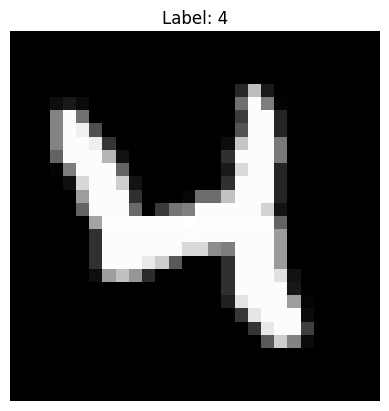

In [7]:
#visualize a single digit

import matplotlib.pyplot as plt
image_index = 20
first_image = train_images[image_index].reshape((28, 28))
plt.imshow(first_image, cmap='gray')
plt.title('Label: {}'.format(train_labels[image_index]))
plt.axis('off')  # Turn off axis labels
plt.show()

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [56]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [43]:
from tensorflow import keras
from tensorflow.keras import layers #type: ignore
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [44]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [45]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [46]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1701 - loss: 2.2809
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5364 - loss: 1.8829
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7162 - loss: 1.1648
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7984 - loss: 0.8087
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8335 - loss: 0.6361


**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:100] #This was modified to 100 to give more examples where failure occurs since the base 10 were returning all passes.
predictions = model.predict(test_digits)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([3.7663014e-04, 4.7542115e-05, 1.3137970e-04, 1.1203157e-03,
       1.6792289e-03, 1.6909239e-03, 5.1950624e-06, 9.6822709e-01,
       3.7491324e-04, 2.6346821e-02], dtype=float32)

In [67]:
predictions[0].argmax()

np.int64(7)

In [68]:
predictions[0][7]

np.float32(0.9682271)

In [69]:
test_labels[0]

np.uint8(7)

**Evaluating the model on new data**

In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8259 - loss: 0.6026
test_acc: 0.8504999876022339


Predicted :9, Actual: 4, Failed Index: 6


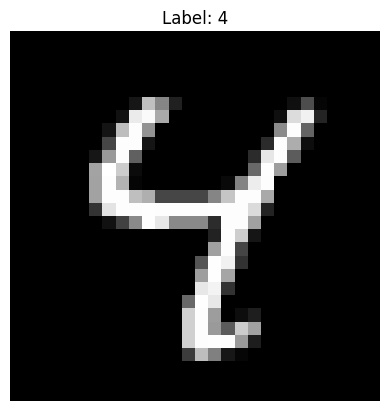

In [ ]:
for i in range(len(predictions)):
    if(predictions[i].argmax() != test_labels[i]):
        print(f"Predicted :{predictions[i].argmax()}, Actual: {test_labels[i]}, Failed Index: {i}")
        plt.imshow(test_images[i].reshape((28, 28)), cmap='gray')
        plt.title(f'Label: {test_labels[i]}')
        plt.axis('off')
        plt.show()
        break

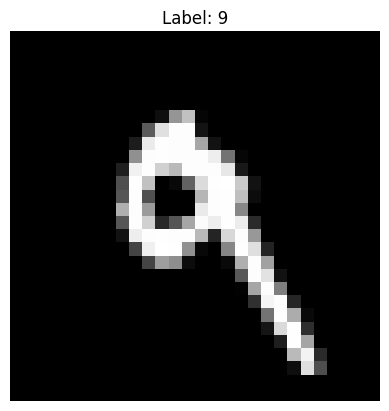

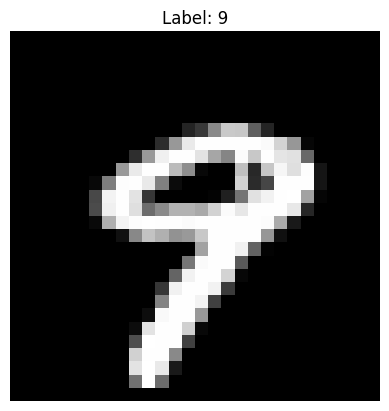

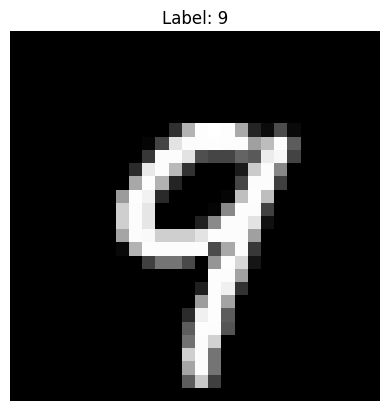

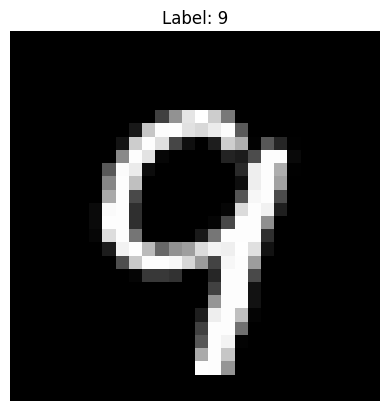

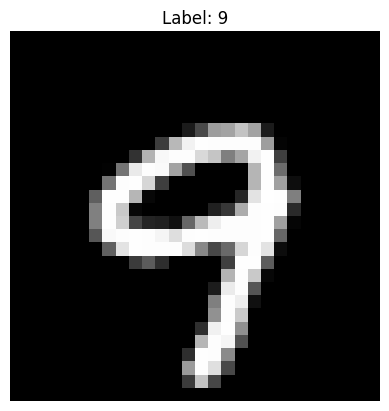

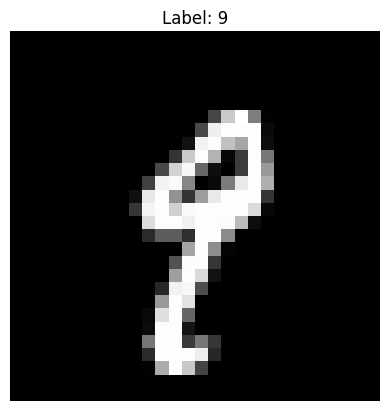

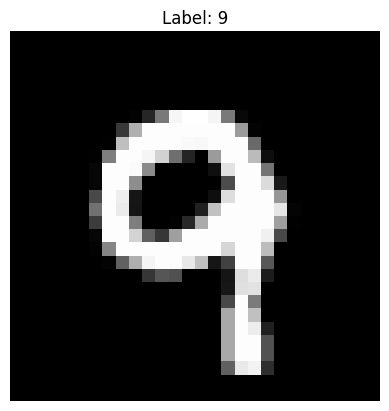

In [76]:
for i in range(len(predictions)):
    if predictions[i].argmax() == 9 and test_labels[i] == 9:
        plt.imshow(test_images[i].reshape((28, 28)), cmap='gray')
        plt.title(f'Label: {test_labels[i]}')
        plt.axis('off')
        plt.show()

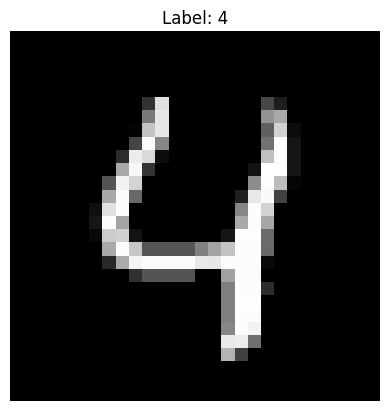

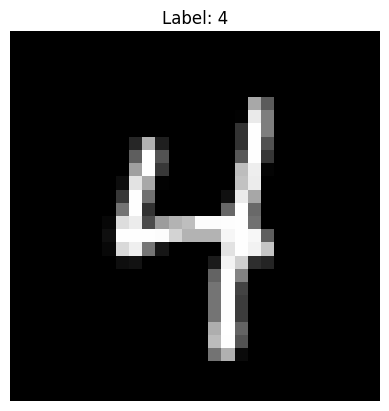

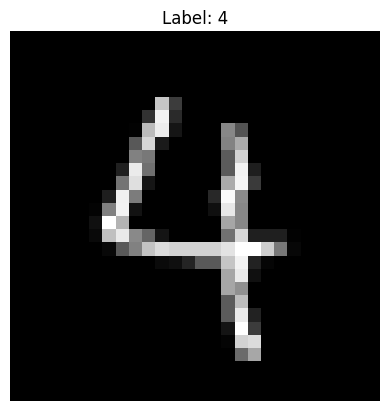

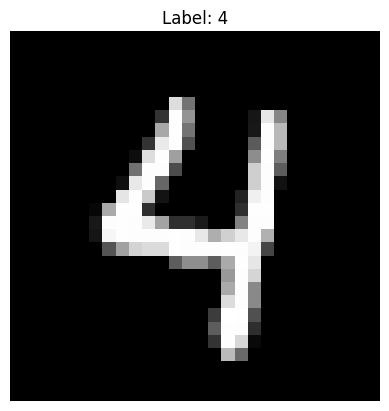

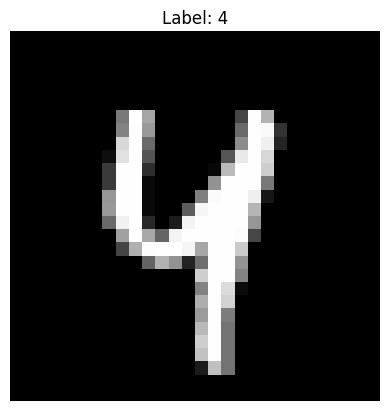

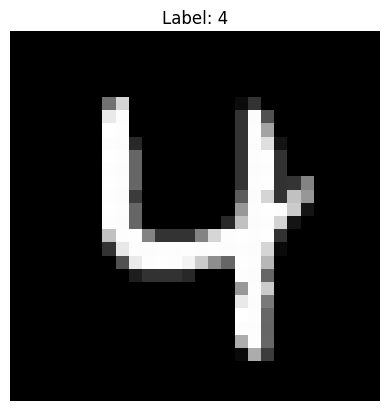

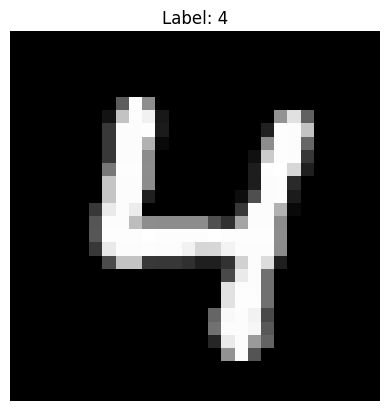

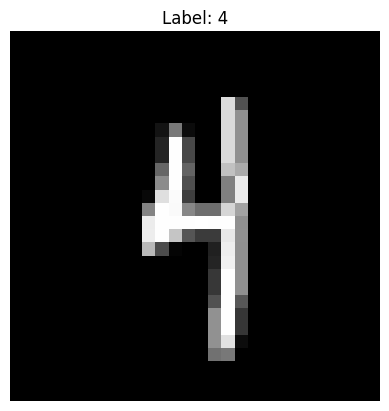

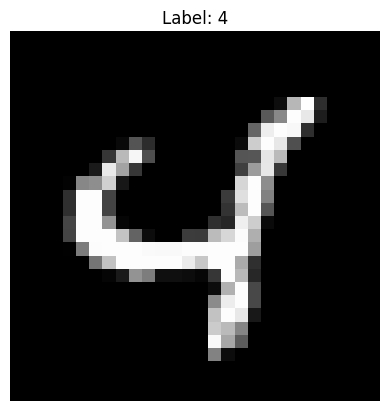

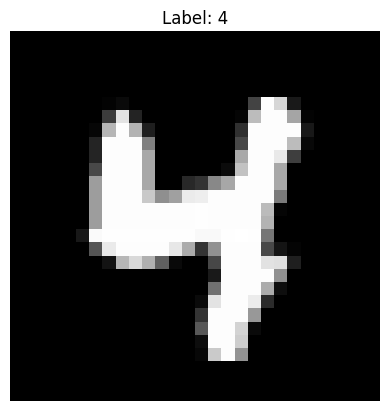

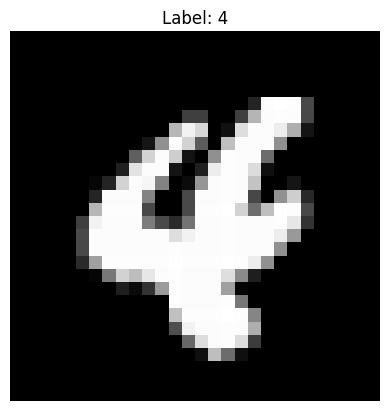

In [78]:
for i in range(len(predictions)):
    if predictions[i].argmax() == 4 and test_labels[i] == 4:
        plt.imshow(test_images[i].reshape((28, 28)), cmap='gray')
        plt.title(f'Label: {test_labels[i]}')
        plt.axis('off')
        plt.show()

# Question Set 2: Use the Above Code and Modify It to Answer:

### Find an example index of which prediction failed. What is the index?

### Answer: Index 6 is the first failure.

### Why did that prediction fail? Visualize the test data and explain why the prediction was wrong.

### Answer: I believe the failed prediction was due to the curvature of the 4. When comparing successfully identified 4's and 9's(9 was predicted), 9's tend to be more curved which matches with how curvy the failed 4 is. The tail of the 4 curves similarly to several 9's predicted successfully, and the left fork curves more inward. Because the model is able to predict 9's even when the cicrle on top is incomplete, it could have also recognized the two forks on the 4 as an incomplete loop.